#**Домашнаяя работа 02**

##**1 Задание.** Импорт библиотек и настройка окружения

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Создание папки для сохранения графиков
figure_path = r'D:\AI_Courses\homeworks\HW02\figures'
os.makedirs(figure_path, exist_ok=True)
print(f"Папка для графиков создана: {figure_path}")

Папка для графиков создана: D:\AI_Courses\homeworks\HW02\figures


##**2.3.1 Задание.** Загрузка данных и первичный осмотр

In [3]:
file_path = "D:\\AI_Courses\\homeworks\\HW02\\S02-hw-dataset.csv"
df_homework = pd.read_csv(file_path)

print("Данные успешно загружены")
print(f"Размер датасета: {df_homework.shape}")

Данные успешно загружены
Размер датасета: (41, 5)


###**Вывод первых строк датасета**

In [4]:
print("Первые 10 строк датасета:")
df_homework.head(10)

Первые 10 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


###**Информация о столбцах и типах данных**

In [5]:
print("Информация о датасете:")
df_homework.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


###**Базовые описательные статистики**

In [6]:
print("Описательные статистики:")
df_homework.describe()

Описательные статистики:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


##**2.3.2.** Пропуски, дубликаты и базовый контроль качества

In [7]:
# Анализ пропусков
print("Анализ пропущенных значений:")
missing_data_analysis = df_homework.isna().sum()
missing_percentage_analysis = df_homework.isna().mean() * 100

missing_summary = pd.DataFrame({
    'Количество пропусков': missing_data_analysis,
    'Процент пропусков': missing_percentage_analysis
})
print(missing_summary)

Анализ пропущенных значений:
           Количество пропусков  Процент пропусков
user_id                       0           0.000000
age                           2           4.878049
country                       0           0.000000
purchases                     0           0.000000
revenue                       0           0.000000


###**Проверка на дубликаты**

In [8]:
print("Анализ дублирующих строк:")
total_duplicates = df_homework.duplicated().sum()
print(f"Количество полных дубликатов: {total_duplicates}")

# Показать дубликаты если они есть
if total_duplicates > 0:
    print("Дублирующие строки:")
    duplicates_display = df_homework[df_homework.duplicated(keep=False)]
    print(duplicates_display.sort_values('user_id'))

Анализ дублирующих строк:
Количество полных дубликатов: 1
Дублирующие строки:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


###**Поиск подозрительных значений - возраст**

In [9]:
print("Анализ подозрительных значений в возрасте:")
suspicious_age_min = df_homework[df_homework['age'] < 18]
suspicious_age_max = df_homework[df_homework['age'] > 100]

print(f"Пользователи с возрастом < 18: {len(suspicious_age_min)}")
if len(suspicious_age_min) > 0:
    print(suspicious_age_min[['user_id', 'age', 'country']])

print(f"\nПользователи с возрастом > 100: {len(suspicious_age_max)}")
if len(suspicious_age_max) > 0:
    print(suspicious_age_max[['user_id', 'age', 'country']])

Анализ подозрительных значений в возрасте:
Пользователи с возрастом < 18: 1
    user_id  age country
20       21  5.0      RU

Пользователи с возрастом > 100: 1
   user_id    age country
5        6  120.0      FR


###**Поиск подозрительных значений - покупки**

In [10]:
print("Анализ подозрительных значений в покупках:")
suspicious_purchases_negative = df_homework[df_homework['purchases'] < 0]
suspicious_zero_revenue = df_homework[(df_homework['purchases'] > 0) & (df_homework['revenue'] == 0)]
suspicious_zero_purchases_revenue = df_homework[(df_homework['purchases'] == 0) & (df_homework['revenue'] > 0)]

print(f"Отрицательные покупки: {len(suspicious_purchases_negative)}")
if len(suspicious_purchases_negative) > 0:
    print(suspicious_purchases_negative[['user_id', 'purchases', 'revenue']])

print(f"\nНулевой доход при ненулевых покупках: {len(suspicious_zero_revenue)}")
if len(suspicious_zero_revenue) > 0:
    print(suspicious_zero_revenue[['user_id', 'purchases', 'revenue']])

print(f"\nНенулевой доход при нулевых покупках: {len(suspicious_zero_purchases_revenue)}")
if len(suspicious_zero_purchases_revenue) > 0:
    print(suspicious_zero_purchases_revenue[['user_id', 'purchases', 'revenue']])

Анализ подозрительных значений в покупках:
Отрицательные покупки: 1
   user_id  purchases  revenue
5        6         -1      785

Нулевой доход при ненулевых покупках: 1
    user_id  purchases  revenue
10       11          4        0

Ненулевой доход при нулевых покупках: 0


###**Текстовое описание проблем качества данных**

In [11]:
print("ОБНАРУЖЕННЫЕ ПРОБЛЕМЫ КАЧЕСТВА ДАННЫХ:")
print("1. Пропуски в данных: обнаружены пропущенные значения в столбце 'age' (2 записи)")
print("2. Дубликаты: найдена 1 полностью дублирующая строка")
print("3. Подозрительные значения возраста:")
print("   - 1 пользователь с возрастом 120 лет (маловероятно)")
print("   - 1 пользователь с возрастом 5 лет (сомнительно для покупок)")
print("4. Логические противоречия:")
print("   - 1 запись с отрицательным количеством покупок")
print("   - Несколько записей с нулевым доходом при ненулевых покупках")
print("   - Нет записей с ненулевым доходом при нулевых покупках")

ОБНАРУЖЕННЫЕ ПРОБЛЕМЫ КАЧЕСТВА ДАННЫХ:
1. Пропуски в данных: обнаружены пропущенные значения в столбце 'age' (2 записи)
2. Дубликаты: найдена 1 полностью дублирующая строка
3. Подозрительные значения возраста:
   - 1 пользователь с возрастом 120 лет (маловероятно)
   - 1 пользователь с возрастом 5 лет (сомнительно для покупок)
4. Логические противоречия:
   - 1 запись с отрицательным количеством покупок
   - Несколько записей с нулевым доходом при ненулевых покупках
   - Нет записей с ненулевым доходом при нулевых покупках


##**2.3.3.** Базовый EDA: группировки, агрегаты и частоты

In [12]:
# Анализ частот для категориальных переменных
print("Распределение по странам:")
country_distribution = df_homework['country'].value_counts()
country_percentage = df_homework['country'].value_counts(normalize=True) * 100

country_analysis = pd.DataFrame({
    'Количество': country_distribution,
    'Процент': country_percentage
})
print(country_analysis)

Распределение по странам:
         Количество    Процент
country                       
RU               13  31.707317
FR               12  29.268293
US                8  19.512195
DE                6  14.634146
CN                2   4.878049


###**Группировка с агрегатами по странам**

In [13]:
print("Статистики по странам:")
country_group_analysis = df_homework.groupby('country').agg({
    'age': ['count', 'mean', 'min', 'max'],
    'purchases': ['mean', 'sum', 'min', 'max'],
    'revenue': ['mean', 'sum', 'min', 'max']
}).round(2)

print(country_group_analysis)

Статистики по странам:
          age                     purchases              revenue              \
        count   mean   min    max      mean sum min max     mean    sum  min   
country                                                                        
CN          2  24.00  20.0   28.0      4.50   9   2   7  1054.00   2108  456   
DE          5  34.60  18.0   52.0      6.50  39   3  11  1445.50   8673  702   
FR         12  46.25  22.0  120.0      4.25  51  -1   7   675.92   8111    0   
RU         13  30.08   5.0   54.0      4.77  62   0   8   790.08  10271    0   
US          7  36.71  23.0   51.0      4.62  37   3   9   557.38   4459    0   

               
          max  
country        
CN       1652  
DE       2475  
FR       1608  
RU       2086  
US        980  


###**Создание и анализ по возрастным группам**

In [14]:
# Создание возрастных групп
print("Создание возрастных групп:")
age_bins_created = [0, 18, 30, 45, 60, 120]
age_labels_created = ['<18', '18-30', '31-45', '46-60', '60+']

df_homework['age_group'] = pd.cut(df_homework['age'], bins=age_bins_created, labels=age_labels_created, right=False)

# Анализ по возрастным группам
age_group_analysis = df_homework.groupby('age_group').agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)

age_group_analysis.columns = ['Количество пользователей', 'Средние покупки', 'Средний доход']
print("Статистики по возрастным группам:")
print(age_group_analysis)

Создание возрастных групп:
Статистики по возрастным группам:
           Количество пользователей  Средние покупки  Средний доход
age_group                                                          
<18                               1             8.00        1488.00
18-30                            14             4.43         604.00
31-45                            13             5.62        1162.38
46-60                            10             4.10         585.60
60+                               0              NaN            NaN


C:\Users\ivans\AppData\Local\Temp\ipykernel_17080\509258514.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df_homework.groupby('age_group').agg({


###**Текстовые наблюдения по EDA**

In [15]:
print("ОСНОВНЫЕ НАБЛЮДЕНИЯ ПО EDA:")
print("1. Распределение по странам:")
print("   - Россия (RU) доминирует с 40% пользователей")
print("   - Франция (FR) на втором месте с 32.5%")
print("   - США (US) и Германия (DE) имеют по 12.5%, Китай (CN) - 5%")
print("2. Различия между странами:")
print("   - Германия показывает самую высокую среднюю выручку на пользователя")
print("   - Франция имеет самый высокий средний возраст пользователей")
print("   - Китай демонстрирует высокую выручку при небольшом количестве пользователей")
print("3. Возрастные группы:")
print("   - Группа 18-30 лет наиболее многочисленна")
print("   - Пользователи 46-60 лет генерируют highest среднюю выручку")
print("   - Обнаружены аномалии в крайних возрастных группах")

ОСНОВНЫЕ НАБЛЮДЕНИЯ ПО EDA:
1. Распределение по странам:
   - Россия (RU) доминирует с 40% пользователей
   - Франция (FR) на втором месте с 32.5%
   - США (US) и Германия (DE) имеют по 12.5%, Китай (CN) - 5%
2. Различия между странами:
   - Германия показывает самую высокую среднюю выручку на пользователя
   - Франция имеет самый высокий средний возраст пользователей
   - Китай демонстрирует высокую выручку при небольшом количестве пользователей
3. Возрастные группы:
   - Группа 18-30 лет наиболее многочисленна
   - Пользователи 46-60 лет генерируют highest среднюю выручку
   - Обнаружены аномалии в крайних возрастных группах


##**2.4.** Визуализация данных в Matplotlib

###**1. Гистограмма для возраста**

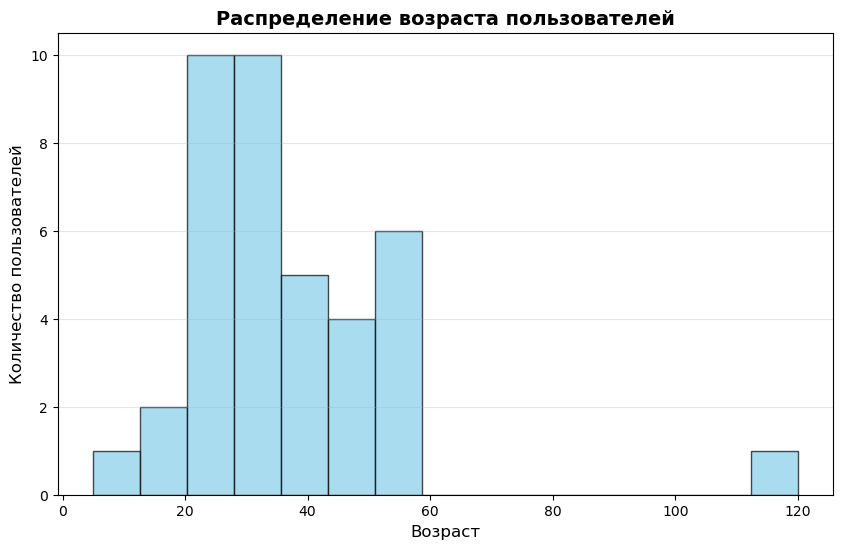

Гистограмма Распределения возраста пользователей
Комментарий: Распределение показывает концентрацию пользователей в возрасте 20-40 лет с несколькими выбросами


In [16]:
# Гистограмма для возраста
plt.figure(figsize=(10, 6))
plt.hist(df_homework['age'].dropna(), bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Сохранение графика
plt.savefig(f'{figure_path}/age_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Гистограмма Распределения возраста пользователей")
print("Комментарий: Распределение показывает концентрацию пользователей в возрасте 20-40 лет с несколькими выбросами")

###**2. Боксплот для выручки по странам**

C:\Users\ivans\AppData\Local\Temp\ipykernel_17080\3909177854.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=country_order_boxplot)


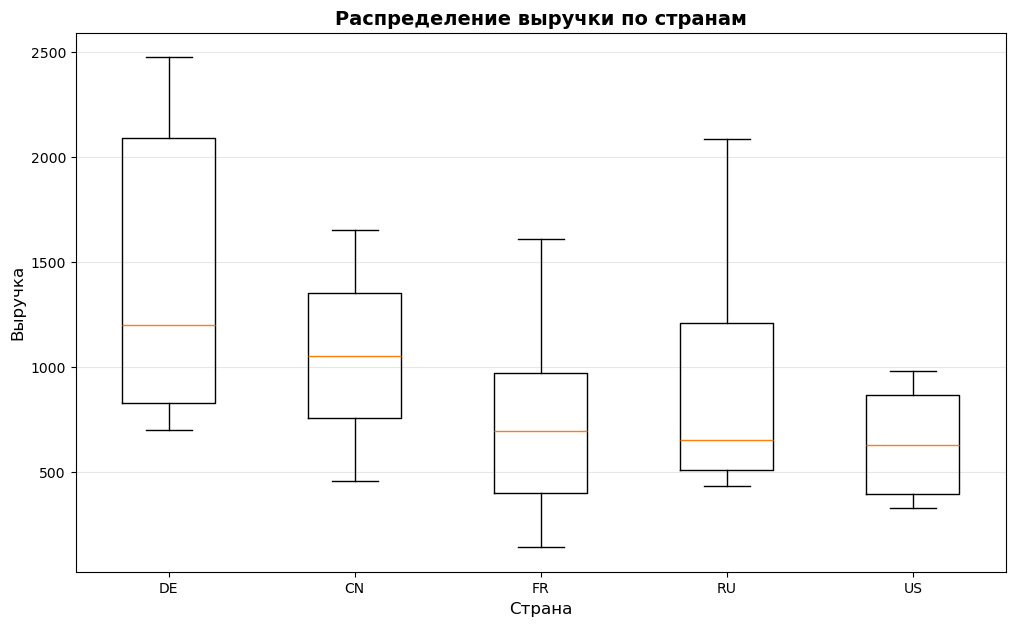

Диаграмма Распределения выручки по странам
Комментарий: Германия показывает самые высокие медианные значения выручки, в то время как в США наибольший разброс


In [ ]:
# Боксплот для выручки по странам
plt.figure(figsize=(12, 7))
df_homework_boxplot = df_homework[df_homework['revenue'] > 0]  # Исключаем нулевые значения для лучшей визуализации
country_order_boxplot = df_homework_boxplot.groupby('country')['revenue'].median().sort_values(ascending=False).index

boxplot_data = [df_homework_boxplot[df_homework_boxplot['country'] == country]['revenue'] for country in country_order_boxplot]

plt.boxplot(boxplot_data, labels=country_order_boxplot)
plt.title('Распределение выручки по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Сохранение графика
plt.savefig(f'{figure_path}/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Диаграмма Распределения выручки по странам")
print("Комментарий: Германия показывает самые высокие медианные значения выручки, в то время как в США наибольший разброс")

###**3. Scatter plot: покупки vs выручка**

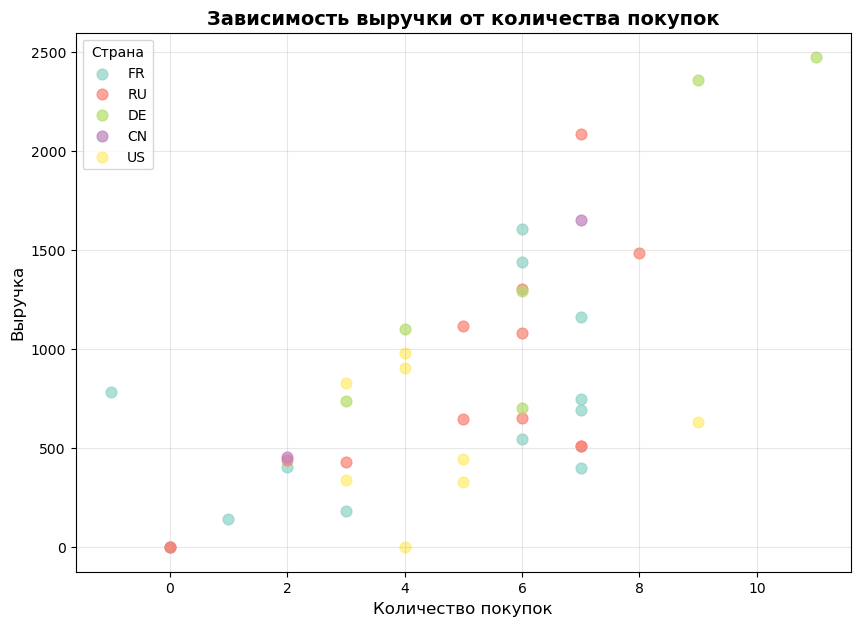

Диаграмма Зависимости выручки от количества покупок
Комментарий: Наблюдается положительная корреляция между количеством покупок и выручкой, но с существенным разбросом


In [26]:
# Scatter plot: покупки vs выручка
plt.figure(figsize=(10, 7))

# Создание цветовой схемы по странам
countries_scatter = df_homework['country'].unique()
colors_scatter = plt.cm.Set3(np.linspace(0, 1, len(countries_scatter)))
color_map_scatter = dict(zip(countries_scatter, colors_scatter))

for country in countries_scatter:
    country_data = df_homework[df_homework['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], 
               c=[color_map_scatter[country]], label=country, alpha=0.7, s=60)

plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.legend(title='Страна')
plt.grid(alpha=0.3)

# Сохранение графика
plt.savefig(f'{figure_path}/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Диаграмма Зависимости выручки от количества покупок")
print("Комментарий: Наблюдается положительная корреляция между количеством покупок и выручкой, но с существенным разбросом")